# Using Lz and Lxy

The BDT predictive variable Lz and Lxy need to be built into the BDT. They have already been included, and Lxy has been shown to be useful. Lz, however, not so much - it gets dropped when we do variable elimination.

Here we will look at:

- General plot of Lz and Lxy
- Explore how their effectiveness varies as a function of eta and anything else that seems relevent

## Initalization

In [1]:
from bdt_training_scikit_tools import plot_training_performance, load_default_samples, test_train_samples, prep_samples, default_training, calc_performance, calc_performance_for_run
import matplotlib.pyplot as plt
plt.rc('font', size=14)
from matplotlib.colors import LogNorm
import pandas as pd
import numpy as np

## Load Data Samples

In [2]:
all_events = load_default_samples("89")

BIB: 200000 events
Multijet: 200000 events
Signal: 200000 events


In [3]:
signal = all_events[2]

In [4]:
signal.columns

Index(['RunNumber', 'Weight', 'WeightMCEvent', 'WeightXSection',
       'WeightFlatten', 'mc_Lxy', 'mc_Lz', 'MHTOverHT', 'JetPt', 'JetPhi',
       'CalRatio', 'JetEta', 'NTracks', 'SumPtOfAllTracks', 'MaxTrackPt',
       'EventNumber', 'JetET', 'JetWidth', 'JetDRTo2GeVTrack', 'EnergyDensity',
       'HadronicLayer1Fraction', 'JetLat', 'JetLong', 'FirstClusterRadius',
       'ShowerCenter', 'BIBDeltaTimingM', 'BIBDeltaTimingP', 'PredictedLz',
       'PredictedLxy', 'InteractionsPerCrossing'],
      dtype='object')

## Basic Plots

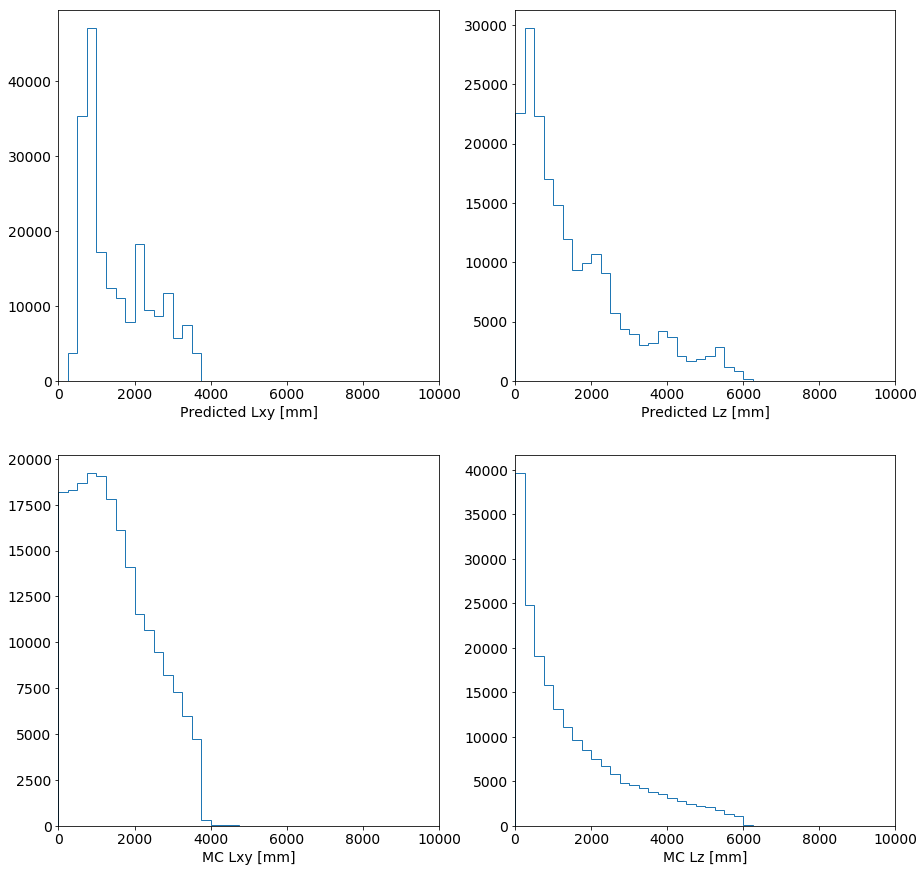

In [13]:
fig = plt.figure(figsize=(15,15))

histargs = {'bins': 40, 'histtype': 'step', 'range': (0, 10000)}

ax = plt.subplot(221)
ax.hist(signal.PredictedLxy, **histargs)
ax.set_xlabel('Predicted Lxy [mm]')
ax.set_xlim(0.0, 10000)

ax = plt.subplot(222)
ax.hist(signal.PredictedLz, **histargs)
ax.set_xlabel('Predicted Lz [mm]')
ax.set_xlim(0.0, 10000)

ax = plt.subplot(223)
ax.hist(signal.mc_Lxy*1000, **histargs)
ax.set_xlabel('MC Lxy [mm]')
ax.set_xlim(0.0, 10000)

ax = plt.subplot(224)
ax.hist(signal.mc_Lz*1000, **histargs)
ax.set_xlabel('MC Lz [mm]')
ax.set_xlim(0.0, 10000)

plt.show()
fig.savefig('basicplots.png')

Clearly, there are some major discrpencies. Explore things like $\eta$ and the like.

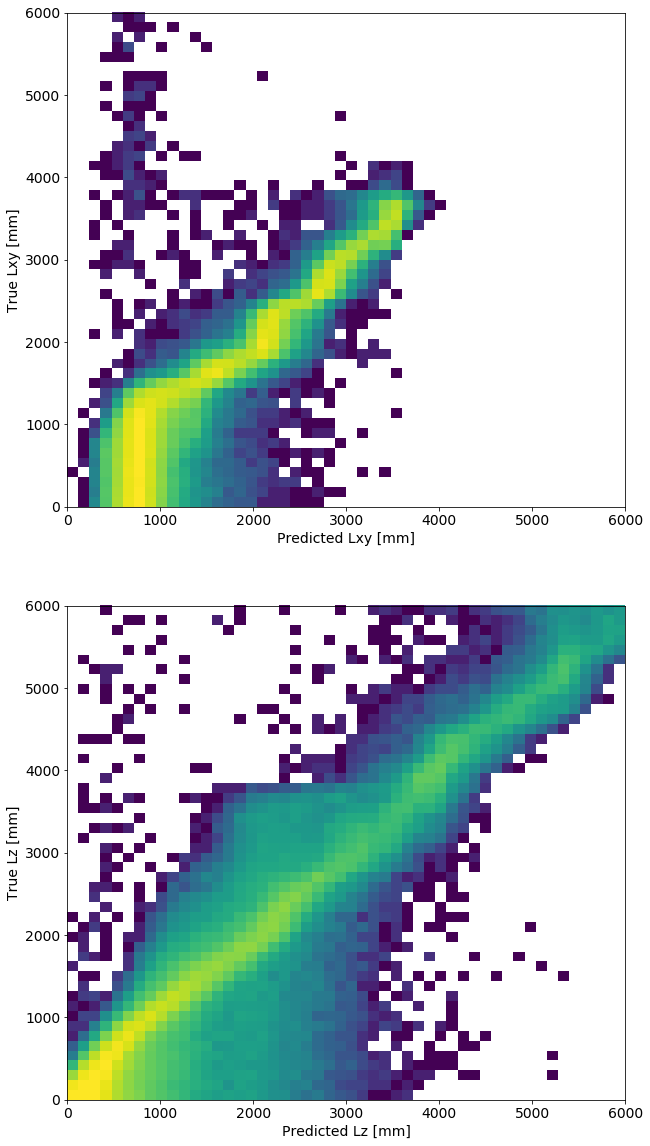

In [14]:
fig = plt.figure(figsize=(10,20))

histargs2d = {'bins':50, 'norm':LogNorm(), 'range': ((0, 6000), (0, 6000))}
ax = plt.subplot(211)
ax.hist2d(signal.PredictedLxy, signal.mc_Lxy*1000, **histargs2d)
ax.set_xlabel('Predicted Lxy [mm]')
ax.set_ylabel('True Lxy [mm]')

ax = plt.subplot(212)
ax.hist2d(signal.PredictedLz, signal.mc_Lz*1000, **histargs2d)
ax.set_xlabel('Predicted Lz [mm]')
ax.set_ylabel('True Lz [mm]')

plt.show()
fig.savefig('lxylz_comparisons.png')

Look at things as a function of distance from their actual value - see if there is a correlation with $\eta$, for example.

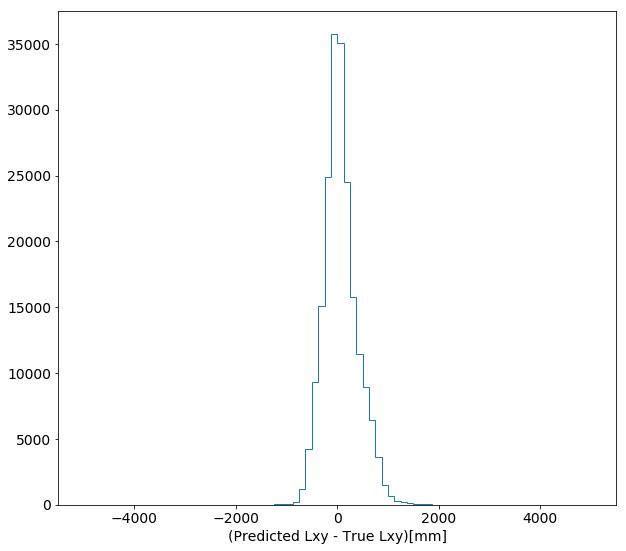

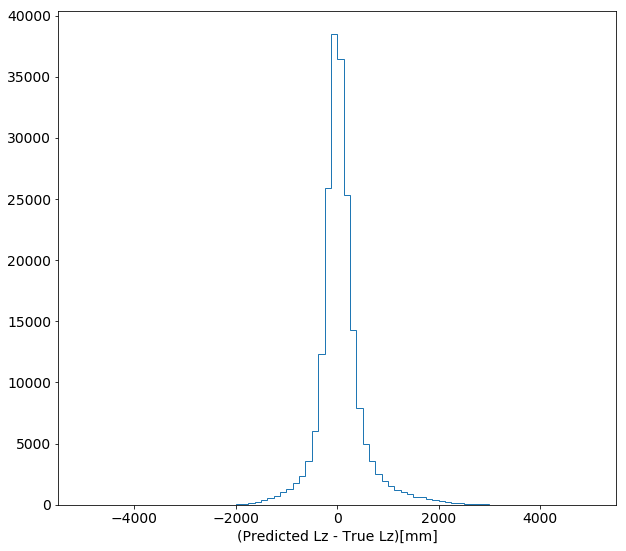

In [19]:
delta_Lxy = signal.PredictedLxy - signal.mc_Lxy*1000
delta_Lz = signal.PredictedLz - signal.mc_Lz*1000

histargs = {'bins': 80, 'histtype': 'step', 'range': (-5000, 5000)}

fig = plt.figure(figsize=(10,20))
ax = plt.subplot(211)
ax.hist(delta_Lxy, **histargs)
ax.set_xlabel('(Predicted Lxy - True Lxy)[mm]')

fig = plt.figure(figsize=(10,20))
ax = plt.subplot(212)
ax.hist(delta_Lz, **histargs)
ax.set_xlabel('(Predicted Lz - True Lz)[mm]')

plt.show()
fig.savefig('lxylz_1dComparison.png')

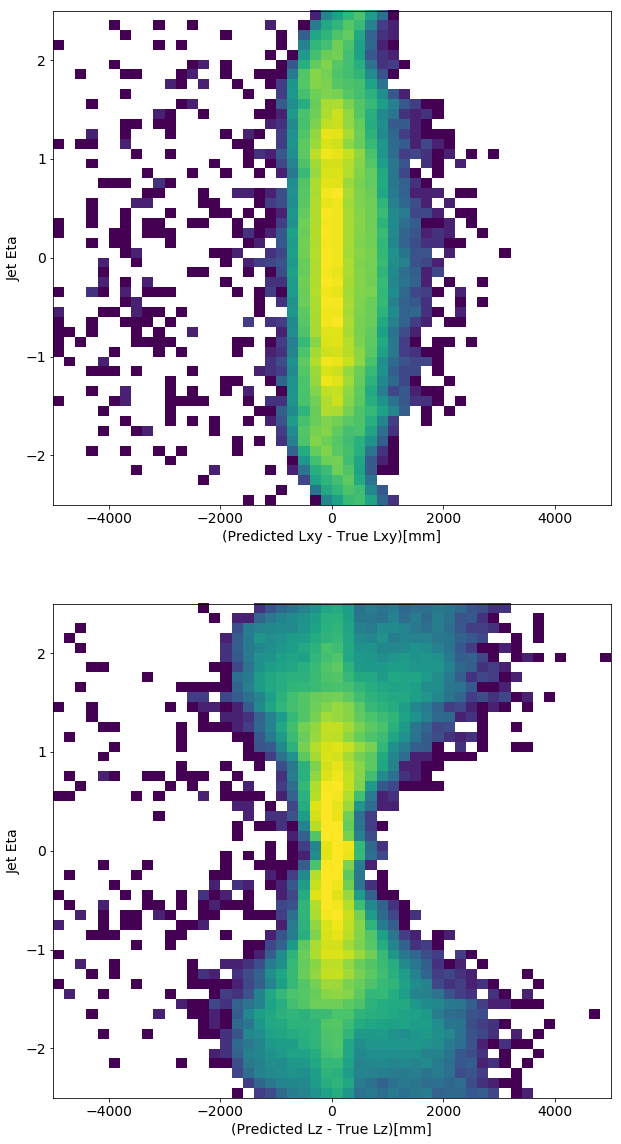

In [16]:
fig = plt.figure(figsize=(10,20))

histargs2d = {'bins':50, 'norm':LogNorm(), 'range': ((-5000, 5000), (-2.5, 2.5))}
ax = plt.subplot(211)
ax.hist2d(delta_Lxy, signal.JetEta, **histargs2d)
ax.set_xlabel('(Predicted Lxy - True Lxy)[mm]')
ax.set_ylabel('Jet Eta')

ax = plt.subplot(212)
ax.hist2d(delta_Lz, signal.JetEta, **histargs2d)
ax.set_xlabel('(Predicted Lz - True Lz)[mm]')
ax.set_ylabel('Jet Eta')

plt.show()
fig.savefig('lxylz_ComparisonVsEta.png')

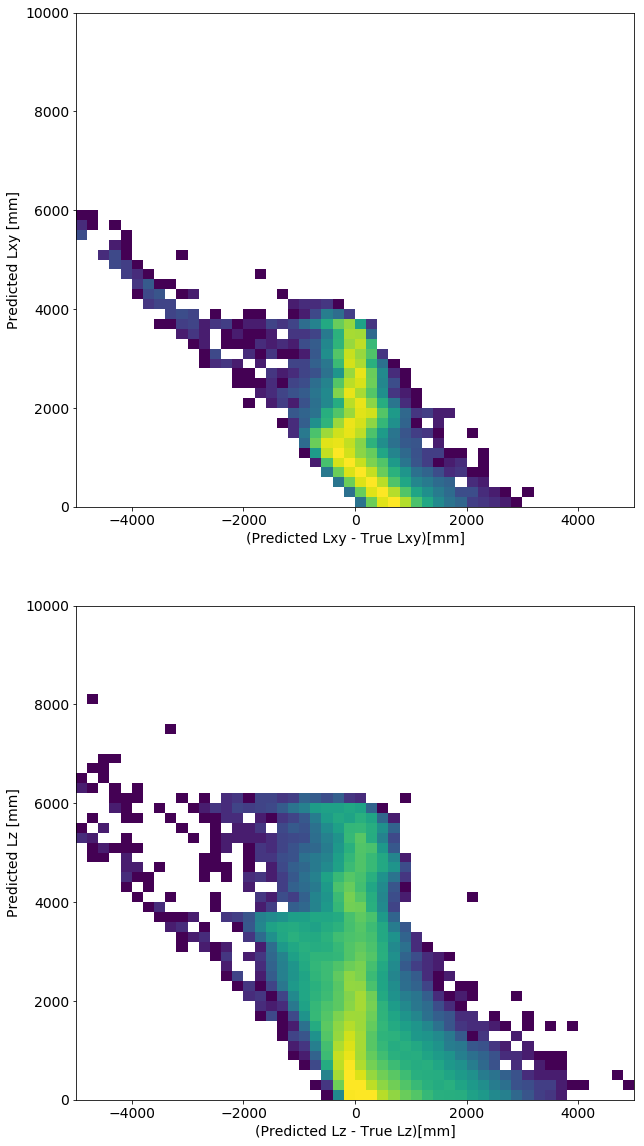

In [17]:
fig = plt.figure(figsize=(10,20))

histargs2d = {'bins':50, 'norm':LogNorm(), 'range': ((-5000, 5000), (0, 10000))}
ax = plt.subplot(211)
ax.hist2d(delta_Lxy, signal.mc_Lxy*1000.0, **histargs2d)
ax.set_xlabel('(Predicted Lxy - True Lxy)[mm]')
ax.set_ylabel('Predicted Lxy [mm]')

ax = plt.subplot(212)
ax.hist2d(delta_Lz, signal.mc_Lz*1000.0, **histargs2d)
ax.set_xlabel('(Predicted Lz - True Lz)[mm]')
ax.set_ylabel('Predicted Lz [mm]')

plt.show()
fig.savefig('lxylz_PredictionVsAccuracy.png')

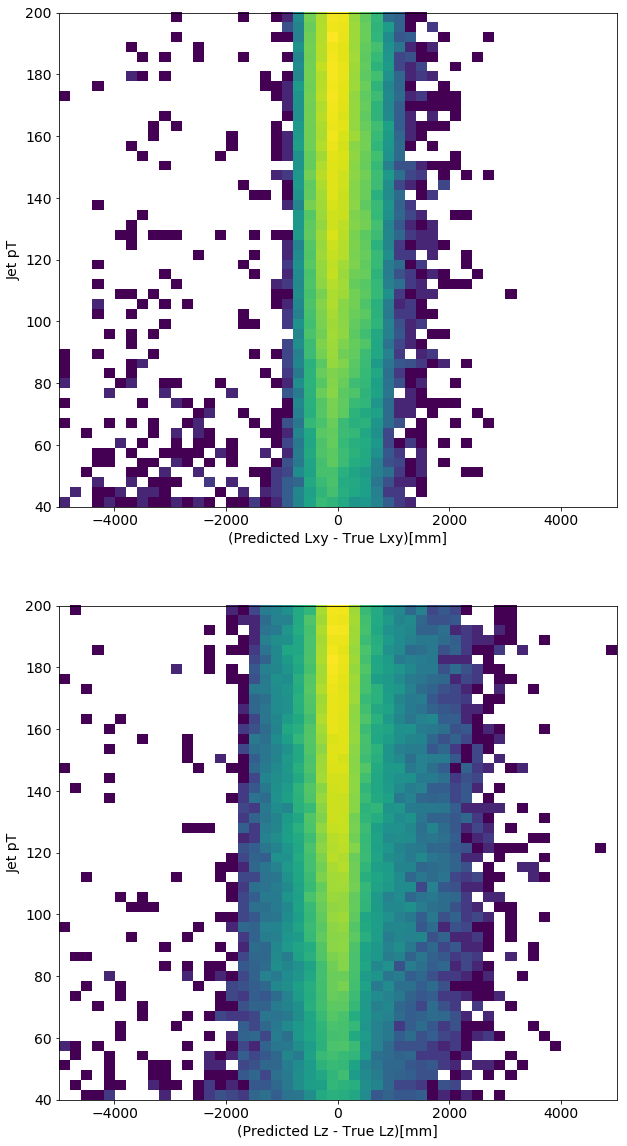

In [18]:
fig = plt.figure(figsize=(10,20))

histargs2d = {'bins':50, 'norm':LogNorm(), 'range': ((-5000, 5000), (40, 200.0))}
ax = plt.subplot(211)
ax.hist2d(delta_Lxy, signal.JetPt, **histargs2d)
ax.set_xlabel('(Predicted Lxy - True Lxy)[mm]')
ax.set_ylabel('Jet pT')

ax = plt.subplot(212)
ax.hist2d(delta_Lz, signal.JetPt, **histargs2d)
ax.set_xlabel('(Predicted Lz - True Lz)[mm]')
ax.set_ylabel('Jet pT')

plt.show()
fig.savefig('lxylz_JetPtVsPrediction.png')